In [2]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
# Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier

from typing import Literal, Any

In [4]:
import requests
import io

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
response1: requests.Response = requests.get(URL1)
data: pd.DataFrame = pd.read_csv(io.StringIO(response1.text))

URL2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv"
response2: requests.Response = requests.get(URL2)
X: pd.DataFrame = pd.read_csv(io.StringIO(response2.text))

Y: np.ndarray[Literal[0, 1], Any] = data["Class"].to_numpy()

In [7]:
"""
According to our SpaceX_Machine_Learning_Prediction_Part_5.ipynb notebook,
the best performing model was the Decision Tree model with the following parameters:
{
    'criterion': 'gini',
    'max_depth': 12,
    'max_features': 'sqrt',
    'min_samples_leaf': 2,
    'min_samples_split': 5,
    'splitter': 'random'
}
So we will train the model with this,
and evaluate its performance.
"""

transform = preprocessing.StandardScaler()
X: np.ndarray[Any, Any] = transform.fit_transform(X)

tree = DecisionTreeClassifier(
    criterion="gini",
    max_depth=12,
    max_features="sqrt",
    min_samples_leaf=2,
    min_samples_split=5,
    splitter="random",
)
tree.fit(X,Y)

DecisionTreeClassifier(max_depth=12, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=5, splitter='random')

In [14]:
from matplotlib.axes import Axes


def plot_confusion_matrix(y, y_predict) -> None:
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm: np.ndarray = confusion_matrix(y, y_predict)
    ax: Axes = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax)
    # annot=True to annotate cells
    ax.set_xlabel("Predicted labels")
    ax.set_ylabel("True labels")
    ax.set_title("Confusion Matrix")
    ax.xaxis.set_ticklabels(["did not land", "land"])
    ax.yaxis.set_ticklabels(["did not land", "landed"])
    plt.show()

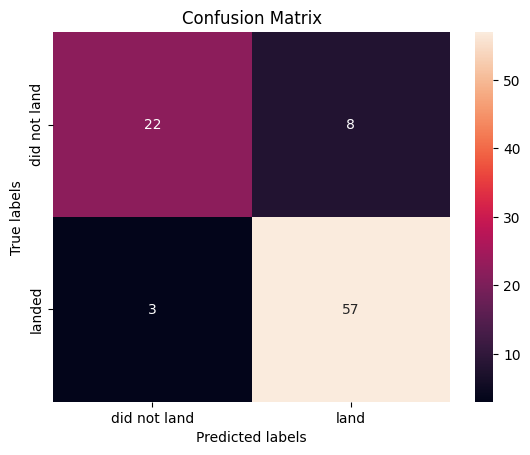

In [11]:
plot_confusion_matrix(Y, tree.predict(X))

In [16]:
print(f'The global score of the Decision Tree model is {tree.score(X, Y)}')

The global score of the Decision Tree model is 0.8777777777777778
